In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import folium

In [3]:
from keplergl import KeplerGl

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [4]:
pd.options.display.float_format = '{:20,.2f}'.format

## Задание 1.
1. Скачать данные по ссылке
https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [6]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.30,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,"1,339.69",Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.30,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.60,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.40,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,"2,537.45",Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.30,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,"1,803.60",Intel,256,SSD


In [7]:
pd.set_option('display.max_rows', None)

In [8]:
df.Price_euros.nunique()

791

### 1.1 Изучите количество памяти с помощью matplotlib

Text(0, 0.5, 'Количество ноутбуков')

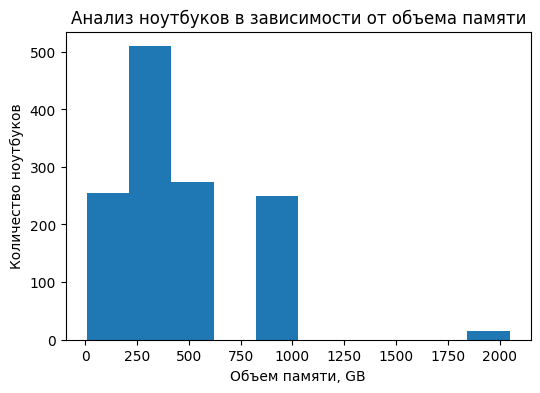

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(df['Memory_Amount'])
plt.title('Анализ ноутбуков в зависимости от объема памяти')
plt.xlabel('Объем памяти, GB')
plt.ylabel('Количество ноутбуков')

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

Text(0, 0.5, 'Количество ноутбуков')

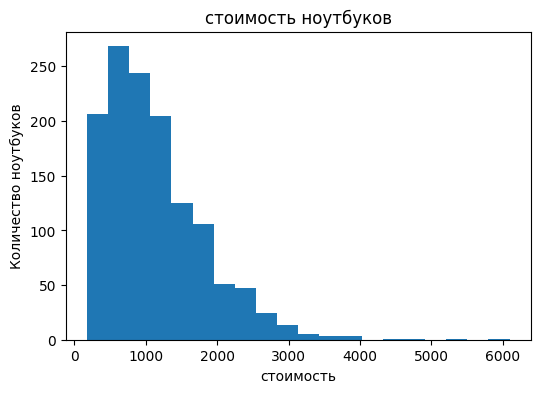

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['Price_euros'], bins=20)
plt.title('стоимость ноутбуков')
plt.xlabel('стоимость')
plt.ylabel('Количество ноутбуков')

### 1.3 Изучите вес ноутбуков с помощью matplotlib


Text(0, 0.5, 'Количество ноутбуков')

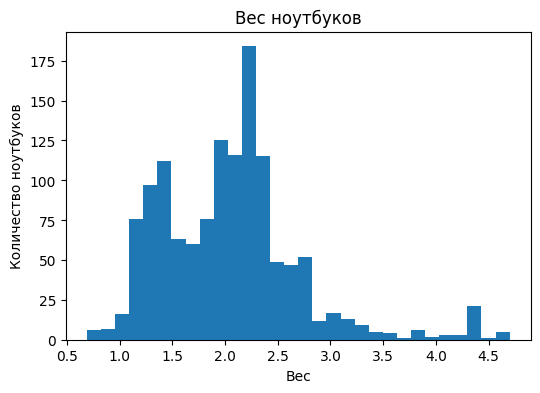

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(df['Weight'], bins=30)
plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Количество ноутбуков')

## Задание 2.
### 2.1 Изучите распределение типов носителя

In [13]:
memory = df["Memory_Type"].value_counts()
memory.head()

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

In [14]:
names = memory.index
values = memory.values

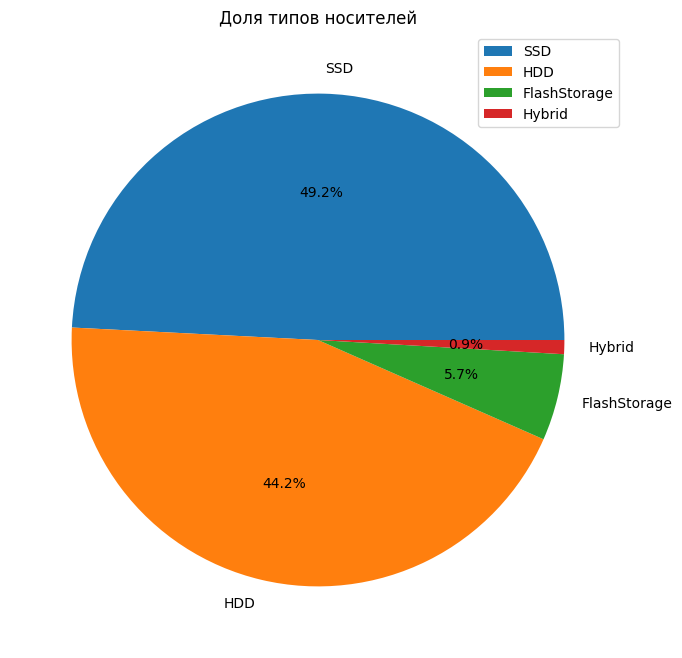

In [15]:
plt.figure(figsize=(10, 8))
plt.pie(values, autopct='%1.1f%%', labels=names)
plt.title('Доля типов носителей')
plt.legend(names, loc='upper right');

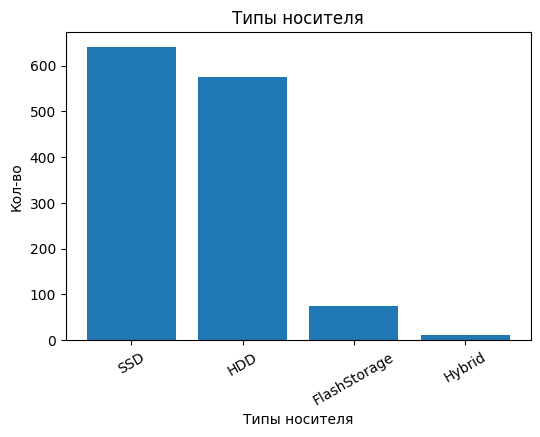

In [16]:
plt.figure(figsize=(6, 4))

plt.bar(memory.index, memory.values)

plt.title('Типы носителя')
plt.xlabel('Типы носителя')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### 2.2 Изучите распределение компаний производителей

In [17]:
data = df['Company'].value_counts()

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(data.index, data.values, palette='viridis')
plt.xticks(rotation=50);

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 600x400 with 0 Axes>

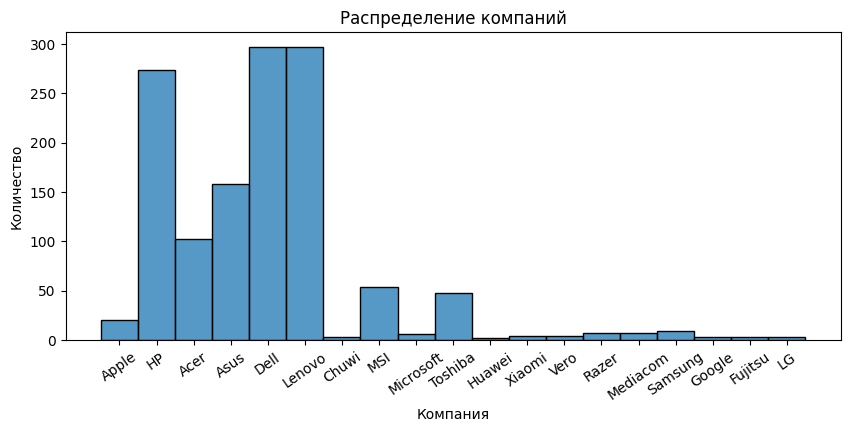

In [19]:
plt.figure(figsize=(10,4))
sns.histplot(df['Company'])
plt.title('Распределение компаний');
plt.xlabel('Компания')
plt.ylabel('Количество');
plt.xticks(rotation=35);

### 2.3 Изучите распределение операционной системы

In [20]:
data = df['OpSys'].value_counts()

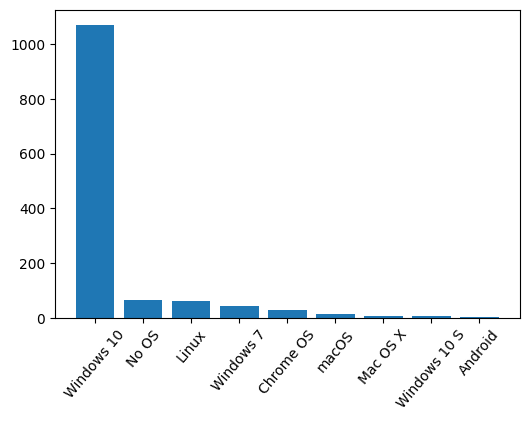

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

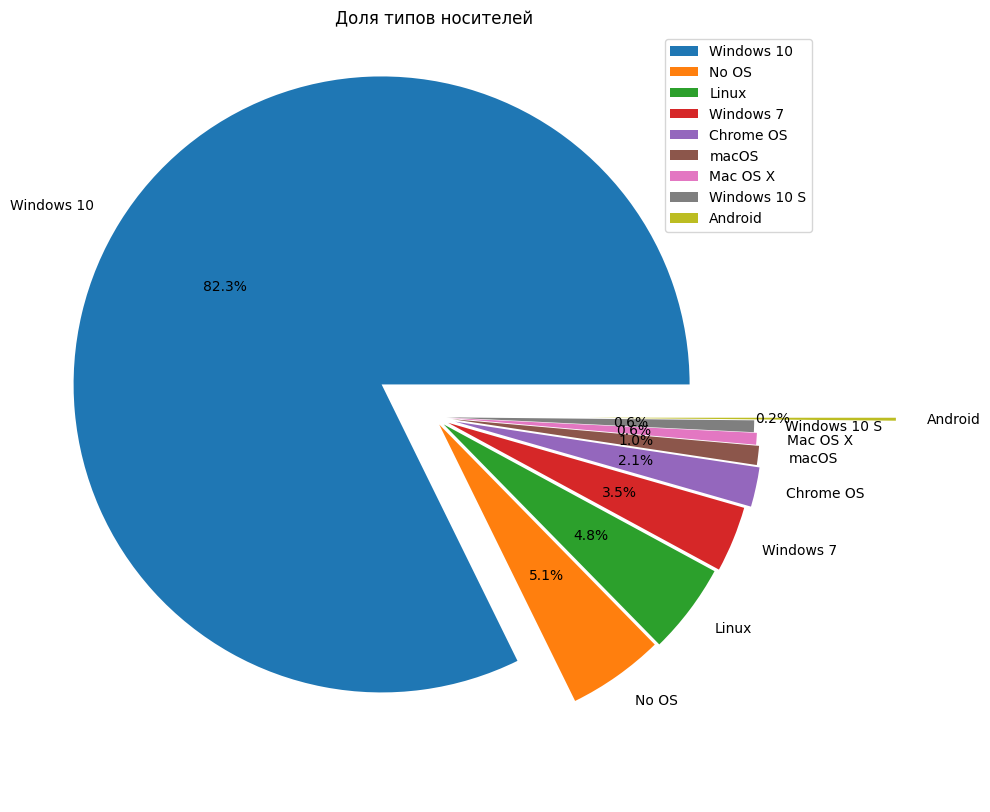

In [22]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Доля типов носителей')
plt.legend(data.index, loc='best');

### 2.4 Изучите распределение компаний производителей CPU

In [19]:
data = df['Cpu_Company'].value_counts()

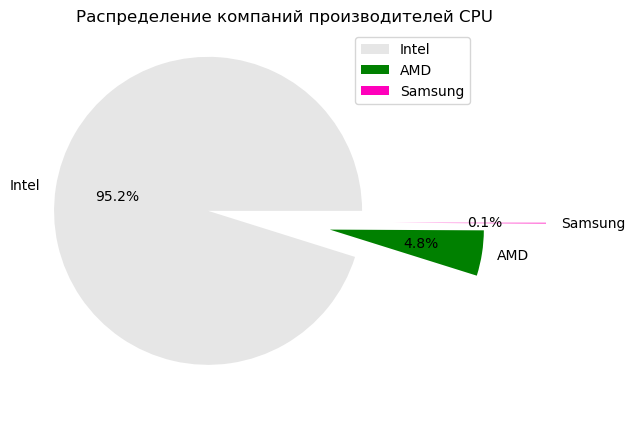

In [20]:
plt.figure(figsize=(5, 5))
explode = [0.5, 0.3, 0.7]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=explode, colors = ["0.9", "g", "#FF00BB",])
plt.title('Распределение компаний производителей CPU')
plt.legend(data.index, loc='best');

## Задание 3.
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму

Процессоры от Samsung не изучайте

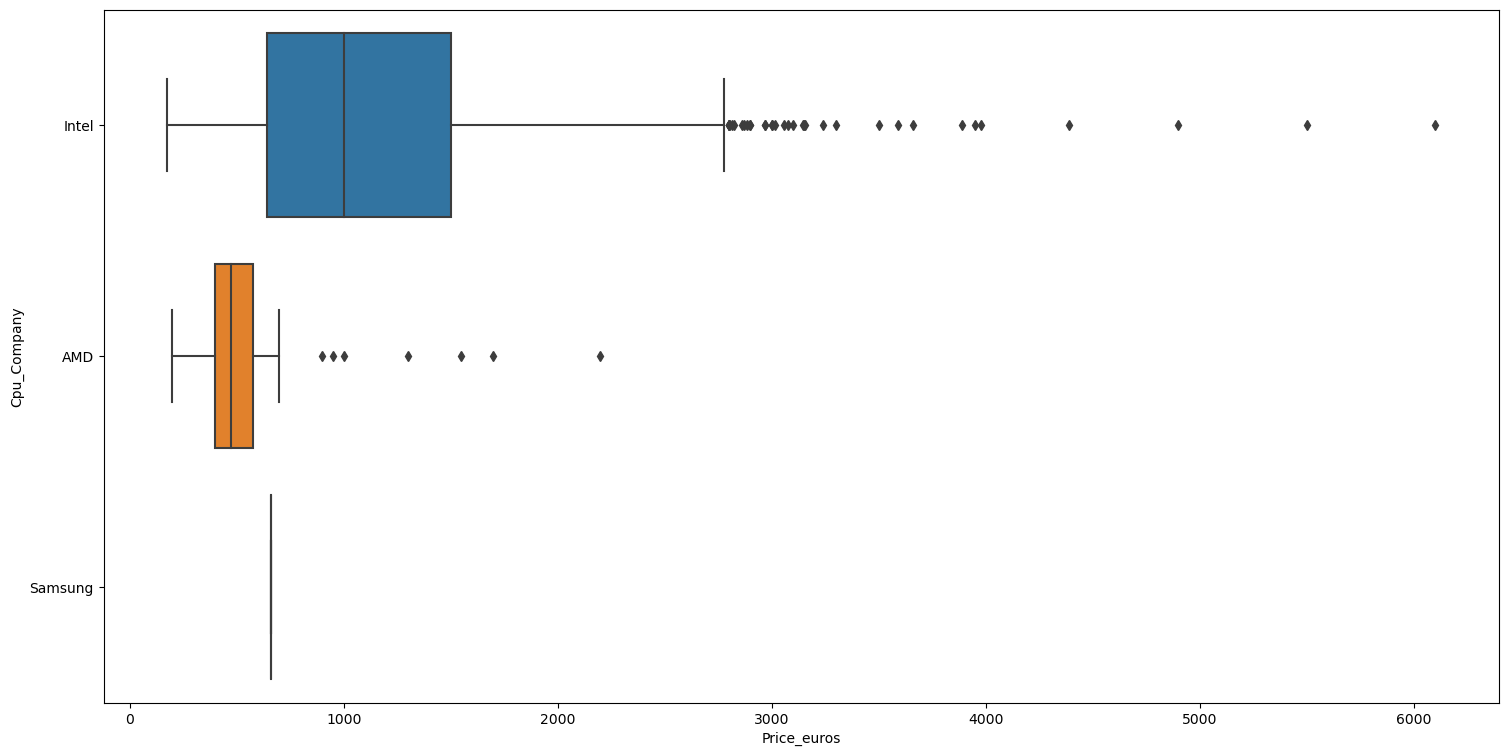

In [21]:
plt.figure(figsize=(18, 9))

sns.boxplot(x=df['Price_euros'], y=df["Cpu_Company"], whis=1.5)

plt.xlabel('Price_euros')
plt.show()

### 3.1 Постройте график в абсолютных величинах

In [22]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [23]:
data = data.drop('Samsung', axis=1).reset_index()
data.head()

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297


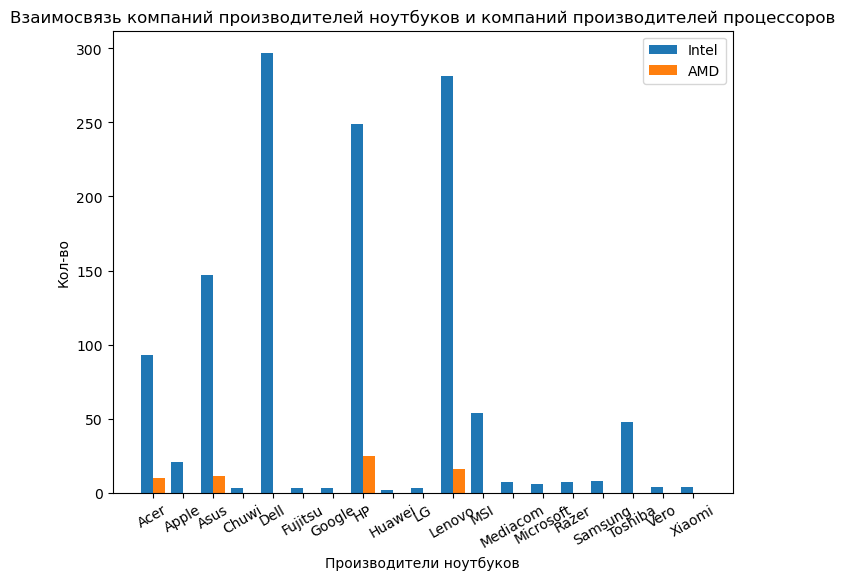

In [24]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

In [25]:
n_ticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

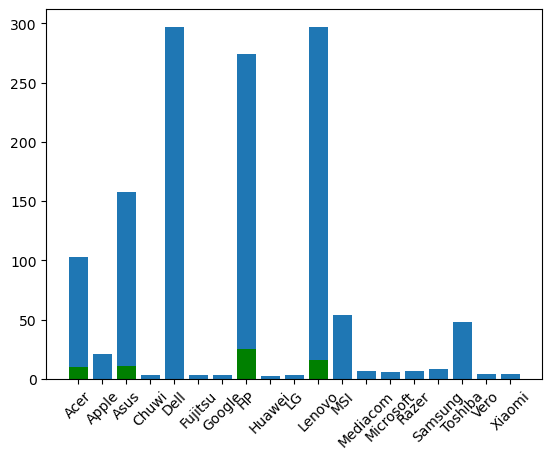

In [26]:
df_company_process = pd.crosstab(df['Company'], df['Cpu_Company'])
df_company_process.drop('Samsung', axis=1, inplace = True)
plt.bar(df_company_process.index,df_company_process['AMD'], color='green')
plt.bar(df_company_process.index,df_company_process['Intel'], bottom = df_company_process['AMD'])

plt.xticks(rotation = 45);

### 3.2 Постройте график в относительных величинах

In [27]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,0.10,0.90,0.00
Apple,0.00,1.00,0.00
Asus,0.07,0.93,0.00
Chuwi,0.00,1.00,0.00
Dell,0.00,1.00,0.00
Fujitsu,0.00,1.00,0.00
Google,0.00,1.00,0.00
HP,0.09,0.91,0.00
Huawei,0.00,1.00,0.00


In [28]:
data = data.drop('Samsung', axis=1).reset_index()
data.head()

Cpu_Company,Company,AMD,Intel
0,Acer,0.10,0.90
1,Apple,0.00,1.00
2,Asus,0.07,0.93
3,Chuwi,0.00,1.00
4,Dell,0.00,1.00


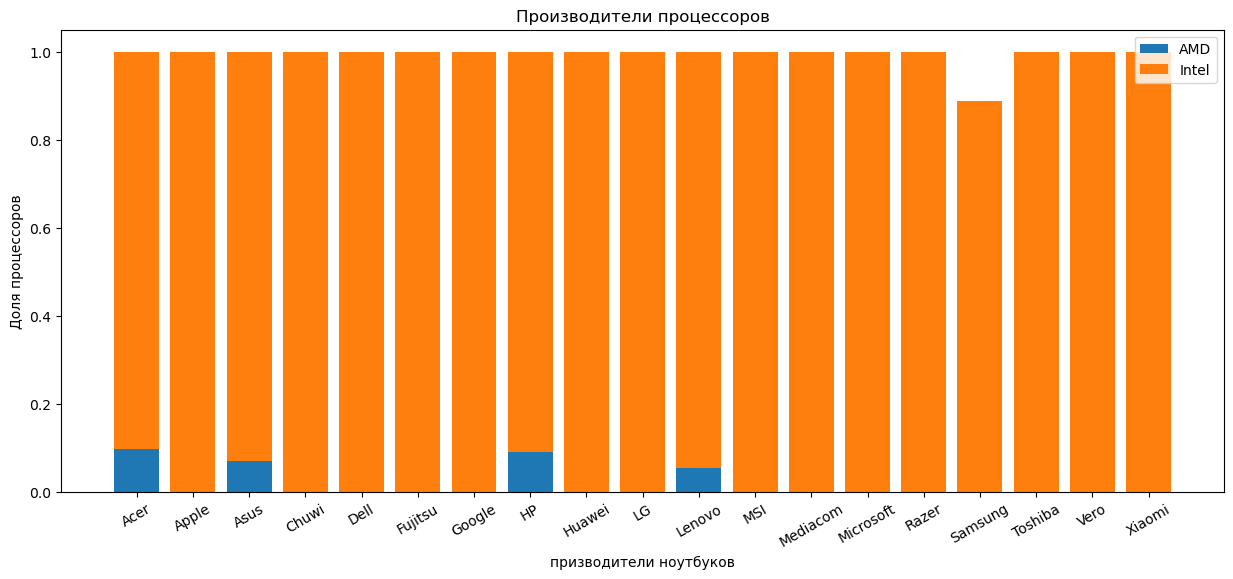

In [29]:
plt.figure(figsize=(15, 6))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Производители процессоров')
plt.xlabel('призводители ноутбуков')
plt.ylabel('Доля процессоров')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 30);

## Задание 4.
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

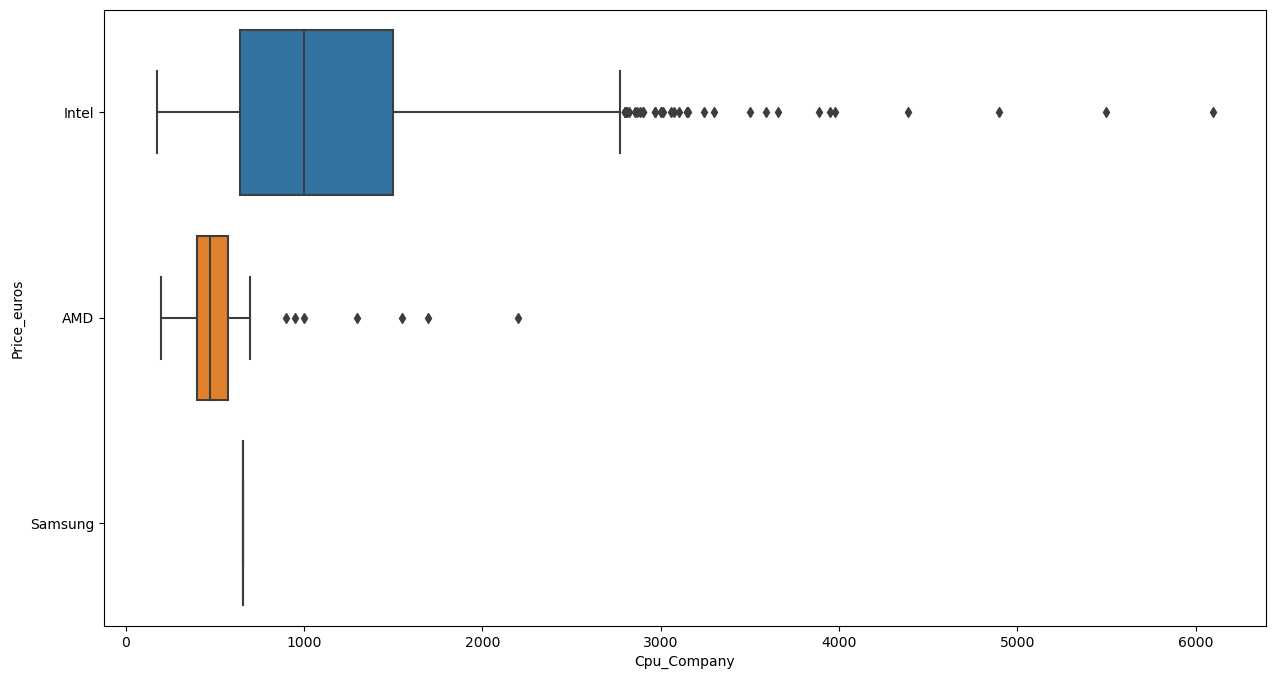

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Cpu_Company"], x=df["Price_euros"])
plt.xlabel("Cpu_Company")
plt.ylabel("Price_euros");

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

<AxesSubplot:xlabel='Price_euros', ylabel='Memory_Type'>

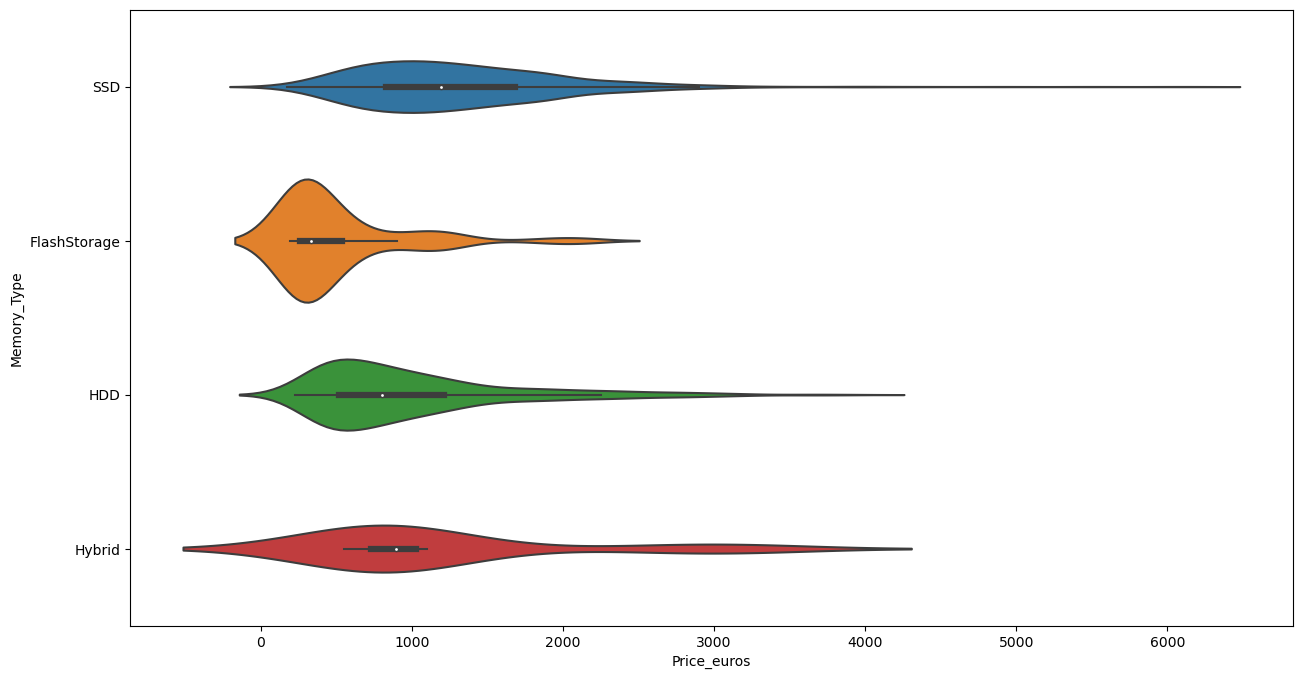

In [31]:
plt.figure(figsize=(15,8))
sns.violinplot(y=df["Memory_Type"], x=df["Price_euros"])

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

<AxesSubplot:xlabel='Price_euros', ylabel='Ram'>

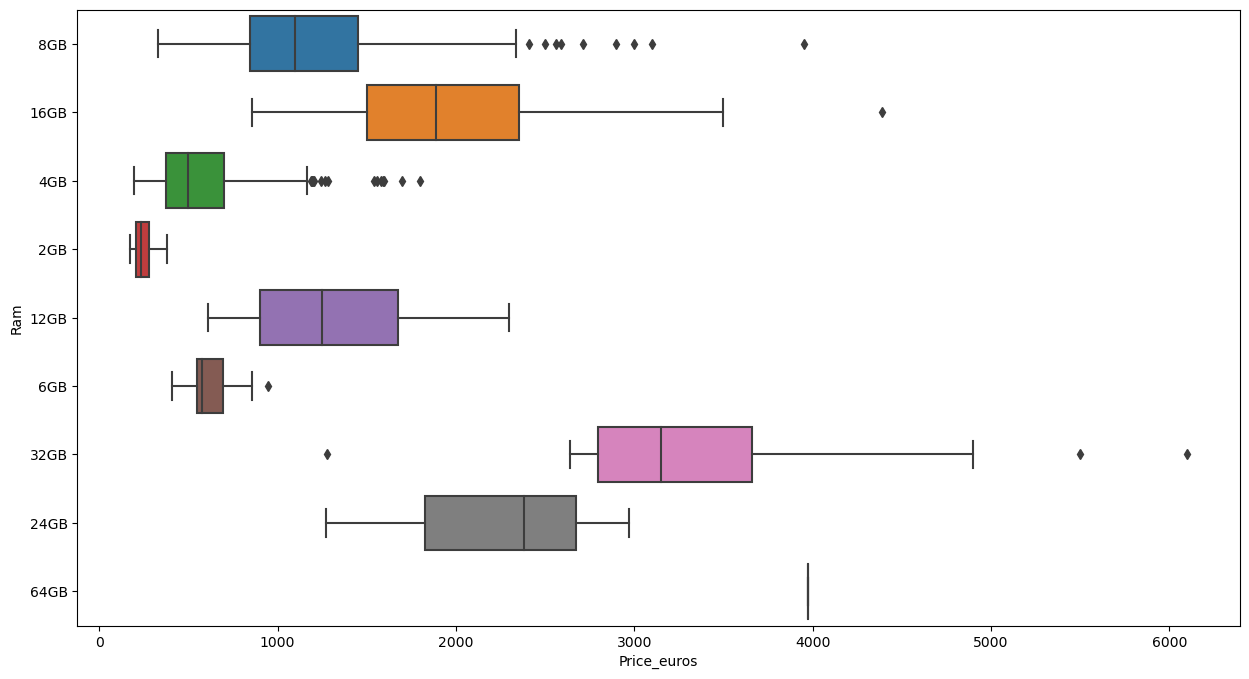

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Ram"], x=df["Price_euros"])

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

<AxesSubplot:xlabel='Price_euros', ylabel='Company'>

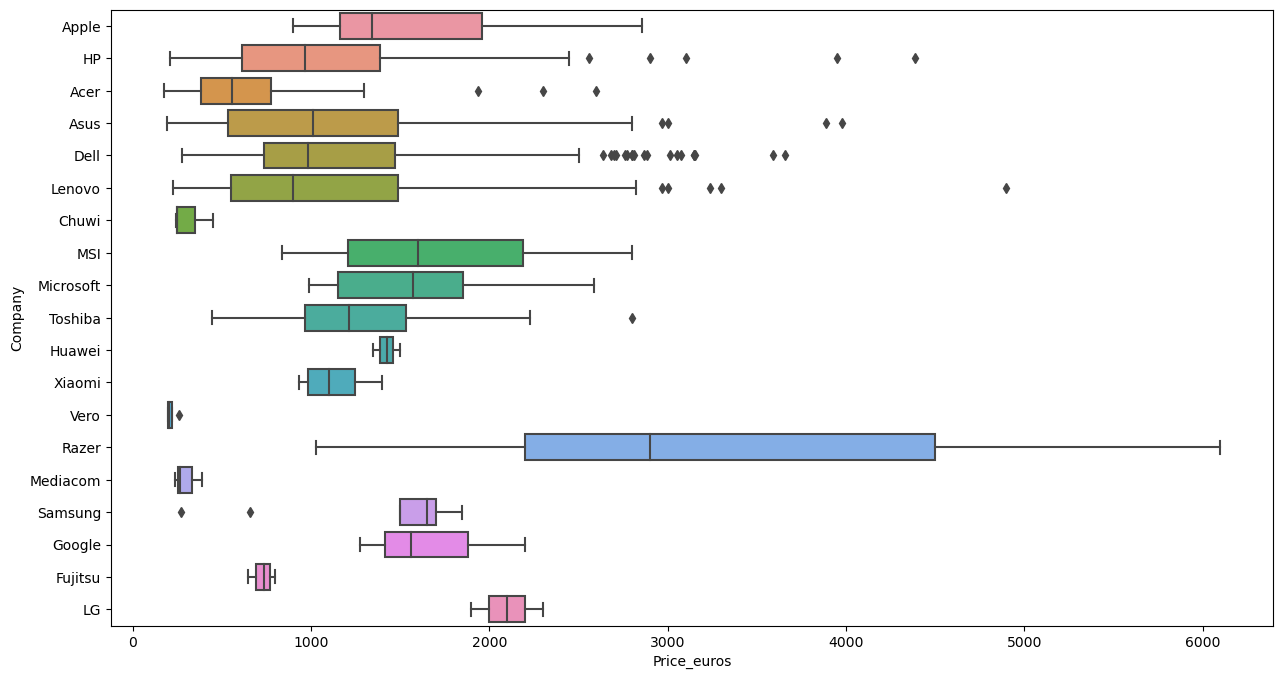

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Company"], x=df["Price_euros"])

## Задание 5*.
Постройте матрицу корреляций для таблицы

In [34]:
corr_matrix = df.corr()
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


In [35]:
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


* до 0,2 - Очень слабая
* до 0,5 - Слабая
* до 0,7 - Средняя
* до 0,9 - Высокая
* свыше 0,9 - Очень высокая корреляция

In [42]:
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.00,0.27
Weight,0.83,1.00,0.21,0.00
Price_euros,0.00,0.21,1.00,0.00
Memory_Amount,0.27,0.00,0.00,1.00


<AxesSubplot:>

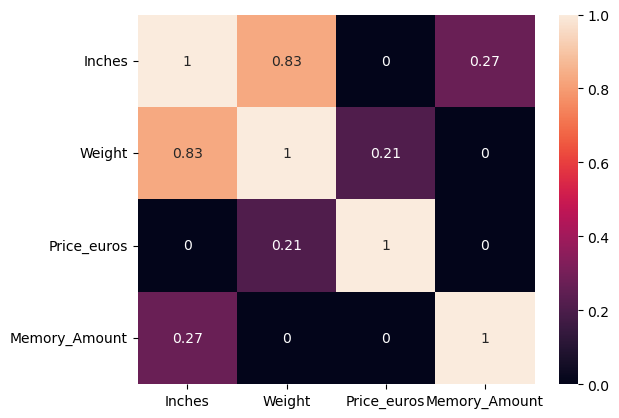

In [43]:
sns.heatmap(corr_matrix, annot=True)

In [44]:
upp_mat = np.triu(df.corr())

<AxesSubplot:>

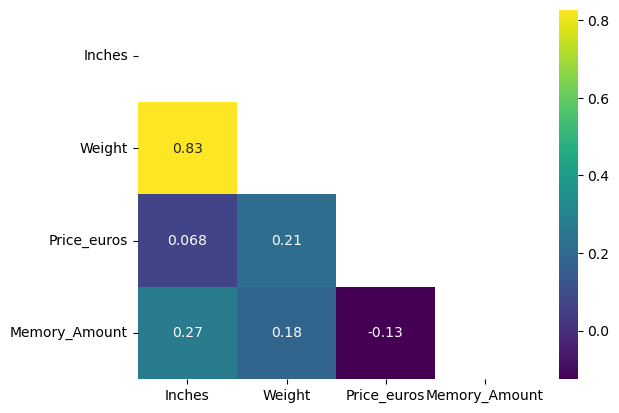

In [45]:
sns.heatmap(df.corr(), annot=True, cmap = 'viridis', mask = upp_mat)

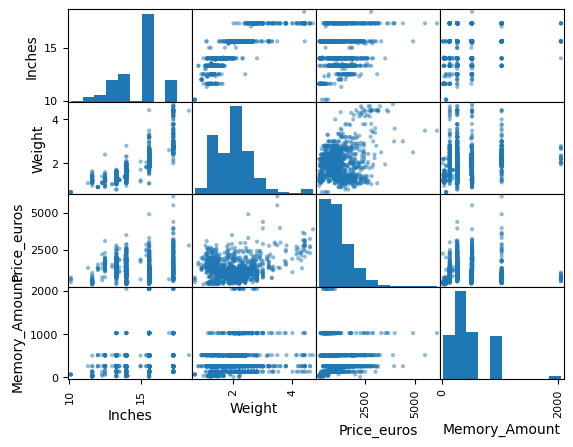

In [40]:
pd.plotting.scatter_matrix(df);

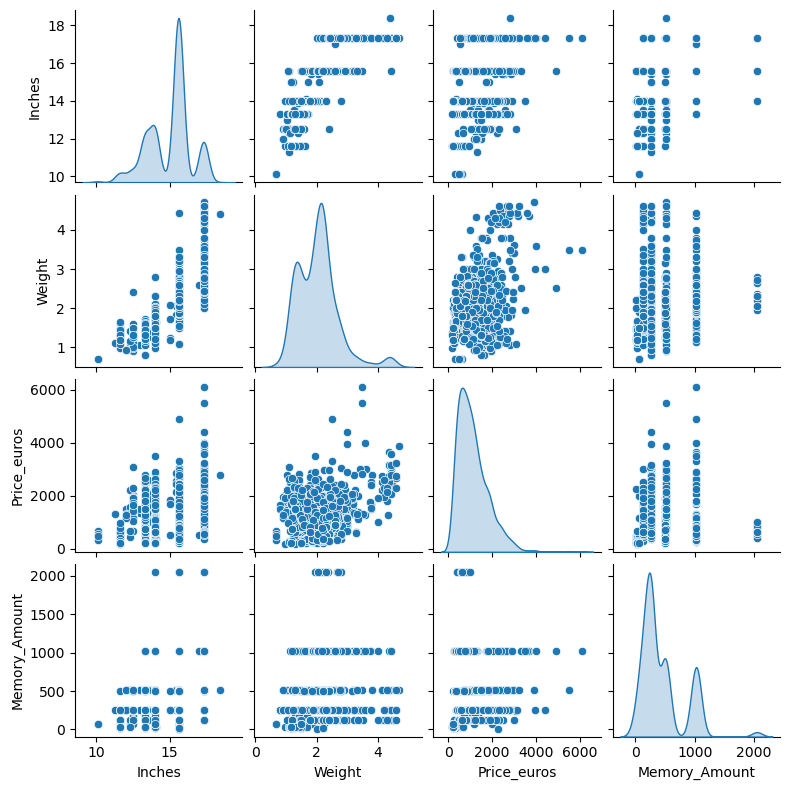

In [46]:
sns.pairplot(df, height=2, kind="scatter", diag_kind="kde")
plt.show()